# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Сбор и анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Работы, присланные иным способом, не принимаются.
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 50 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов
* Задача 3 &mdash; 100 баллов

---

**Добрый день, уважаемый проверяющий.** Я очень старался, делая это задание, надеюсь и вам будет приятно его проверять. Иногда я использовал стандартный plt (а не sns), чтобы разобраться в базовой библиотеке, надеюсь это не проблема.

In [3]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

print("Success")

You should consider upgrading via the '/opt/homebrew/Cellar/jupyterlab/3.2.9/libexec/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/homebrew/Cellar/jupyterlab/3.2.9/libexec/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/homebrew/Cellar/jupyterlab/3.2.9/libexec/bin/python3.9 -m pip install --upgrade pip' command.
Success


### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

На занятии мы уже <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/titanik.html" target="_blank">начинали</a> работать с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных получить некоторое приближенное правило определения, выжил пассажир или нет.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [8]:
PATH_TO_DATASET = "titanik.csv"

In [9]:
data = pd.read_csv(PATH_TO_DATASET)
# data

Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [10]:
train = data.sample(frac=0.7, random_state=0).sort_values(by='PassengerId')
test = data.drop(train.index).sort_values(by='PassengerId').reset_index(drop=True)
train.reset_index(drop=True, inplace=True)
# print(train["PassengerId"], test["PassengerId"])

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [11]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак

def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [12]:
train, train_target = get_features_and_target(train)
test, test_target = get_features_and_target(test)

#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно. 

*Не забывайте про информативность и эстетичность графиков.*

**Здесь я решил проверить как устроена таблица, чтобы удостовериться о типах и пропусках.**

In [13]:
print("NaNs:\n\n", train.isna().sum())

print("\nTypes:\n\n", train.dtypes)

NaNs:

 Pclass      0
Sex         0
Age       121
SibSp       0
Parch       0
Fare        0
dtype: int64

Types:

 Pclass      int64
Sex        object
Age       float64
SibSp       int64
Parch       int64
Fare      float64
dtype: object


**Создадим функцию plot_data, с помощью которой построим 6 графиков с зависимостями каждой величины (Pclass/Sex/...) от целевого признака. Разместим их на одной Figure.**

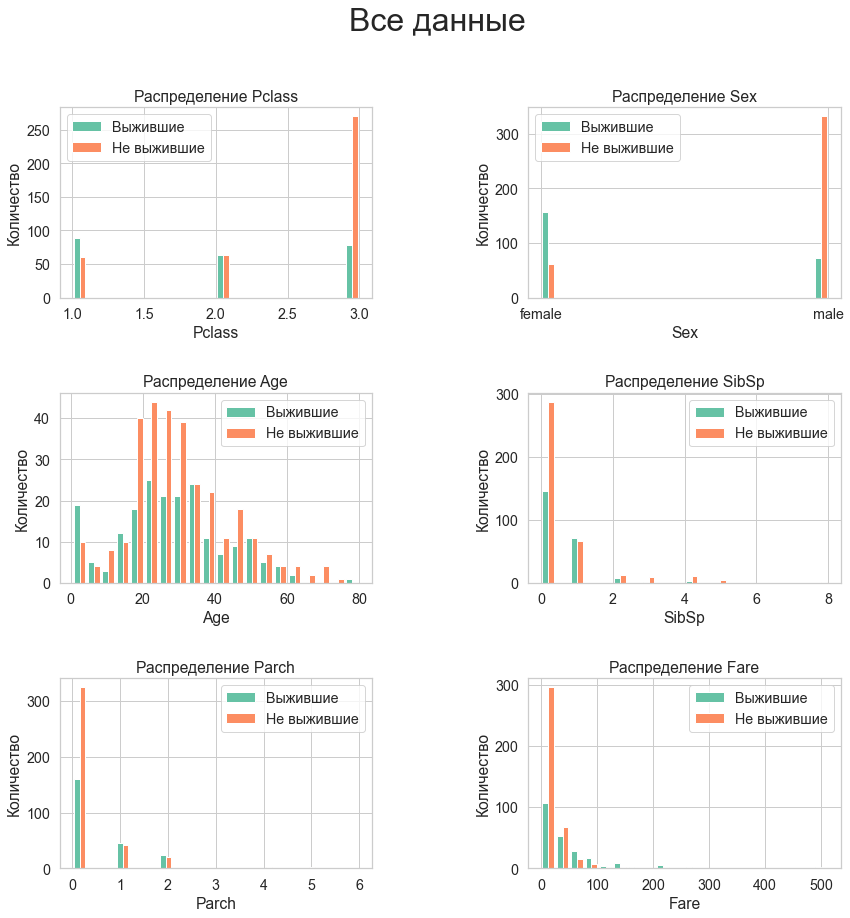

In [14]:
plt.rcParams['figure.figsize'] = [14, 14]

def plot_data(data, target, label):
    fig, axs = plt.subplots(3, 2)
    fig.suptitle(label, fontsize=32)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    for i, column in enumerate(train.columns):
        ax = axs[i // 2][i % 2]
        ax.hist([data[target == 1][column], data[target == 0][column]],
                    bins=20, label=['Выжившие', 'Не выжившие'])
        ax.legend()
        ax.set_title(f'Распределение {str(column)}')
        ax.set_xlabel(column)
        ax.set_ylabel("Количество")

plot_data(train, train_target, "Все данные")

**Разделим людей по признаку Sex и рассмотрим отдельно данные для мужчин и женщин**

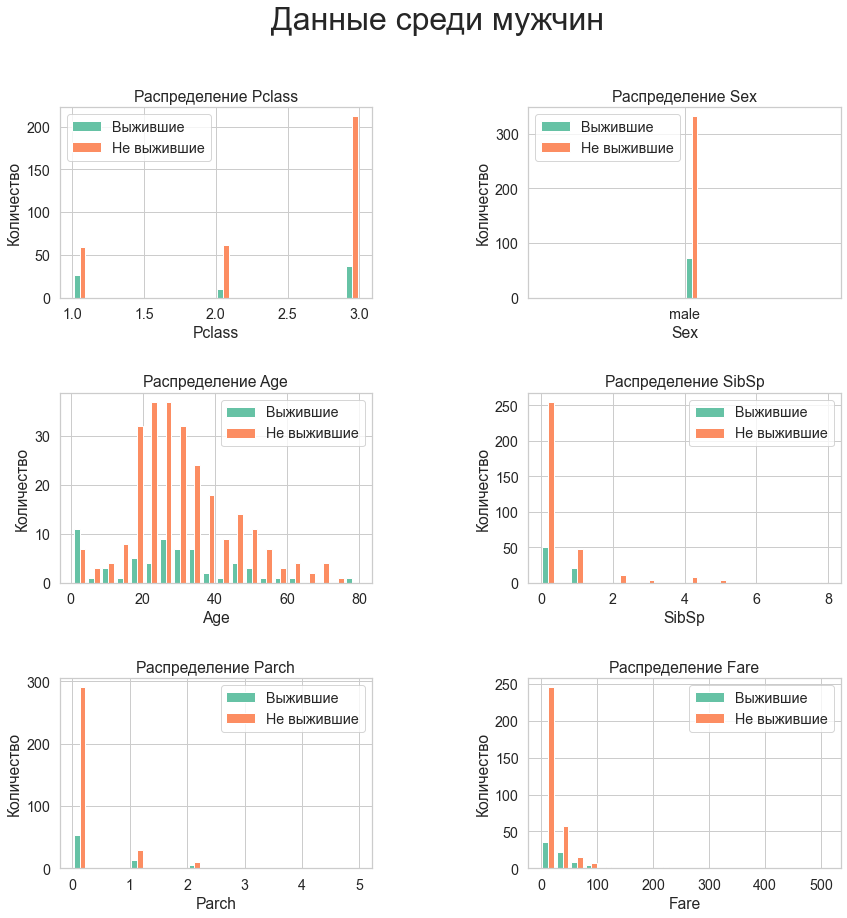

In [15]:
plot_data(train[train["Sex"] == 'male'], train_target[train["Sex"] == 'male'], "Данные среди мужчин")

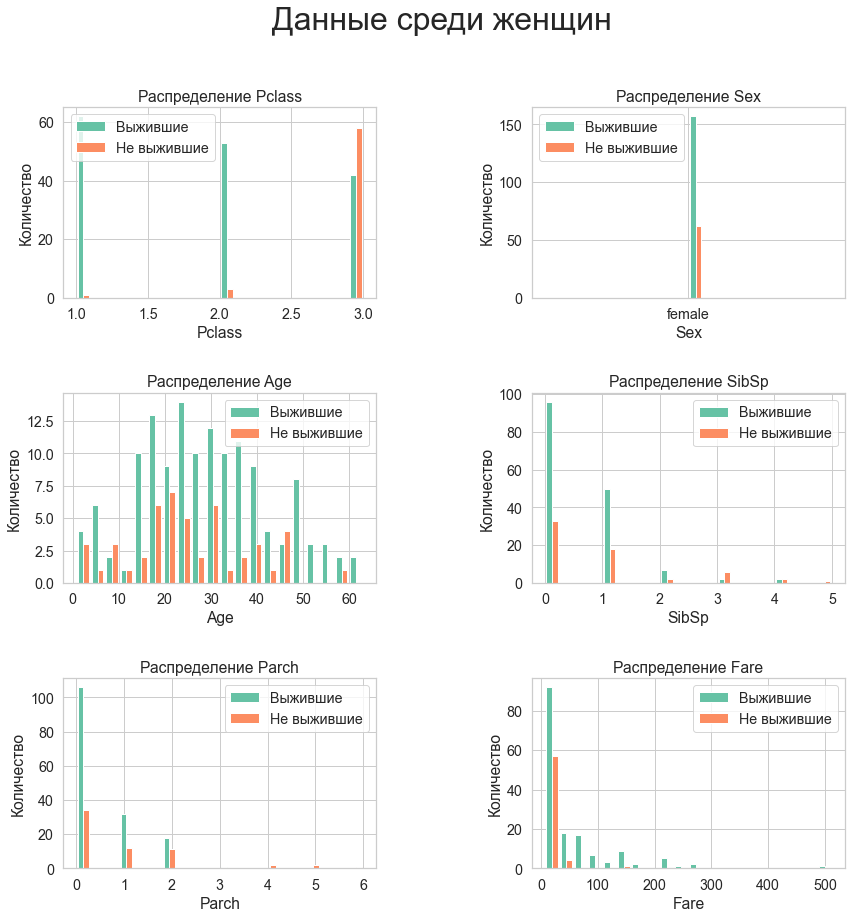

In [16]:
plot_data(train[train["Sex"] == 'female'], train_target[train["Sex"] == 'female'], "Данные среди женщин")

**Подробнее рассмотрим график Цены билета(Fare). Это понадобится нам для дерева2.**

Text(0, 0.5, 'Количество')

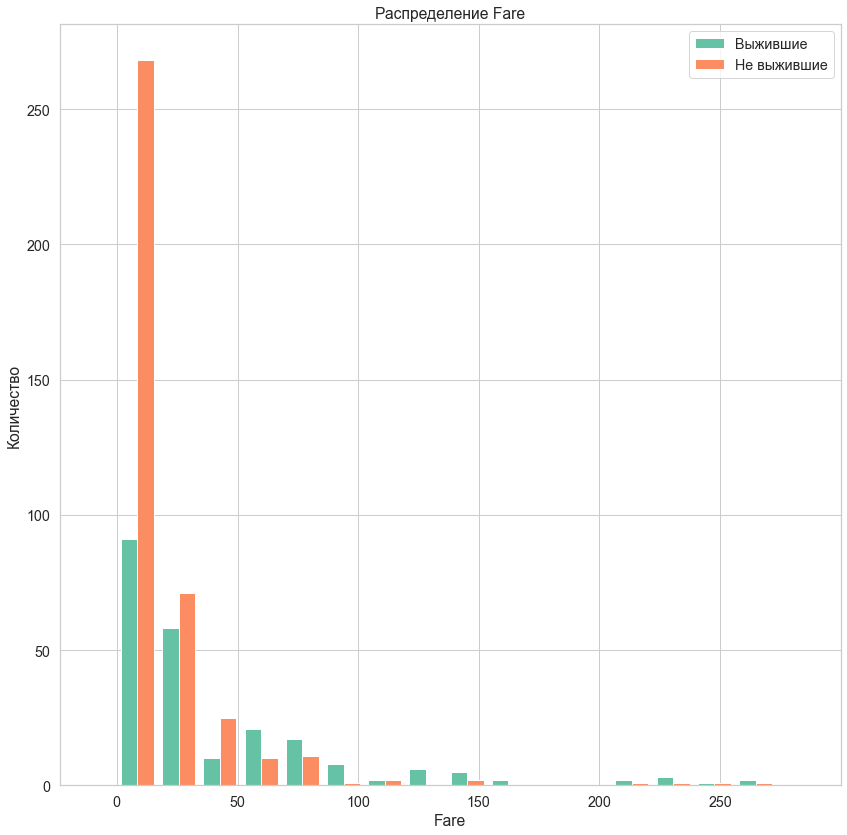

In [17]:
ax = plt.axes()
ax.hist([train[train_target == 1]["Fare"], train[train_target == 0]["Fare"]],
                    bins=30, label=['Выжившие', 'Не выжившие'])
ax.legend()
ax.set_title(f'Распределение Fare')
ax.set_xlabel("Fare")
ax.set_xticks(np.arange(0, 300, 50))
ax.set_xlim(right=300)
ax.set_ylabel("Количество")

#### 3. Классификация

На основе проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков).

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**

**Легко заметить, что есть женщины чаще выживают, мужчины чаще - нет.**
**После выбора первичного признака(Sex), попробуем подробнее рассмотреть мужчин и женщин отдельно.\
Заметим, что женщины с Pclass = 3 реже выживают, чем умирают.\
Заметим, что мужчины с небольшим Age чаще выживают, чем умирают.\
В обоих утверждениях имеется логика, к тому же.**

**Дерево 2:**

**Внимателнее взглянув на график распределения Цены билета, выведем критерий Fare > 50.** 

Реализуйте полученные деревья по шаблону,

In [18]:
'''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
'''

def tree1(features):
    female = (features["Sex"] == 'female')
    klass = (features["Pclass"] < 2.5)
    age = (features["Age"] < 5)
    return ((female & klass) | (~female & age)).apply(lambda x: 1 if x else 0)

def tree2(features):
    prediction = (features["Fare"] > 50)
    return prediction.apply(lambda x: 1 if x else 0)

#### 4. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

**Соотношение верно угаданных ко всем.** 

Реализуйте данный критерий по шаблону

In [19]:
def criteria(target, predicted):
    array = (target == predicted)
    return len(array[array == True]) / len(array)

Посчитайте качество полученных ранее деревьев

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

**Выведем качество деревьев на тренировочной выборке(нерепрезентативно) и на контрольной.**

In [20]:
print(f"!Нерепрезентативно!, дерево глубины 2: {criteria(train_target, tree1(train))}")
print(f"!Нерепрезентативно!, дерево глубины 1: {criteria(train_target, tree2(train))}")
print()
print(f"Дерево глубины 2: {criteria(test_target, tree1(test))}")
print(f"Дерево глубины 1: {criteria(test_target, tree2(test))}")

!Нерепрезентативно!, дерево глубины 2: 0.8157051282051282
!Нерепрезентативно!, дерево глубины 1: 0.6971153846153846

Дерево глубины 2: 0.7453183520599251
Дерево глубины 1: 0.6441947565543071


#### 5. Выводы

**После анализа графиков различных признаков в зависимости от целевого признака удалось найти признаки, по которым были построены решающие деревья. Признаки: Пол(первичный), Возраст и Класс билета, а также Цена билета.**

Выведены закономерности - выживали чаще:
1. Женщины
2. Дети
3. Люди с высоким классом билета
4. Люди с высокой ценой билета


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="yelp.com">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

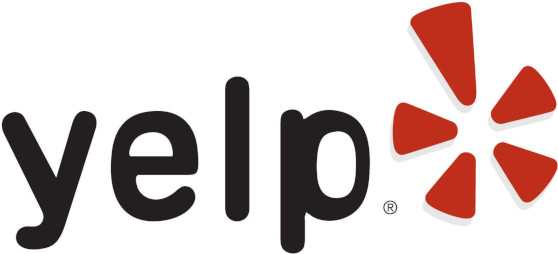

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.

------

### Note: В этом задании пояснения часто излишни, ведь задания вполне исчерпывающие.

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [4]:
data = pd.read_csv("yelp_business.csv")
data.head()

,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,1,Dentists;General Dentistry;Health & Medical;Or...
1,1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1,Departments of Motor Vehicles;Public Services ...
3,3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,0,Sporting Goods;Shopping
4,4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [5]:
top = data.groupby("city").count().sort_values(by="business_id", ascending=False).head(5)
target_city = top.index[0]
top

,Unnamed: 0,business_id,name,neighborhood,address,state,postal_code,latitude,longitude,is_open,categories
city,,,,,,,,,,,
Las Vegas,26775,26775,26775,21887,26775,26775,26655,26775,26775,26775,26775
Phoenix,17213,17213,17213,0,17213,17213,17121,17213,17213,17213,17213
Toronto,17206,17206,17206,14064,17206,17206,17102,17205,17205,17206,17206
Charlotte,8553,8553,8553,5844,8553,8553,8517,8553,8553,8553,8553
Scottsdale,8228,8228,8228,0,8228,8228,8201,8228,8228,8228,8228


Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

In [6]:
target_data = data[data.city == target_city]
target_data = target_data.drop('Unnamed: 0', axis='columns')

**Перед выполнением графической части второго задания(начиная с этого момента), ожидается, что первое задание было полностью запущено. Это повлияет на внешний вид графиков.** 

Text(0.5, 1.0, 'Бизнесы в Лас-Вегасе')

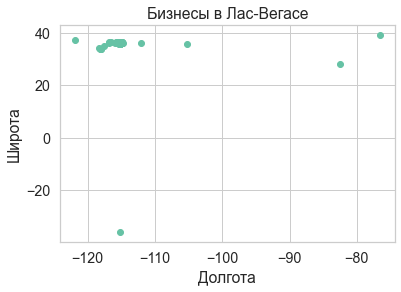

In [7]:
ax = plt.axes()
ax.scatter(target_data.longitude, target_data.latitude)
ax.set_xlabel("Долгота")
ax.set_ylabel("Широта")
ax.set_title("Бизнесы в Лас-Вегасе")

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. 

На этом графике должны выделяться некоторые улицы. Откройте карту города `N` и сравните ее с построенным графиком.

*Замечание. Подгружать карту города в качестве фона графика мы научимся чуть позже.*

Text(0.5, 1.0, 'Бизнесы в Лас-Вегасе')

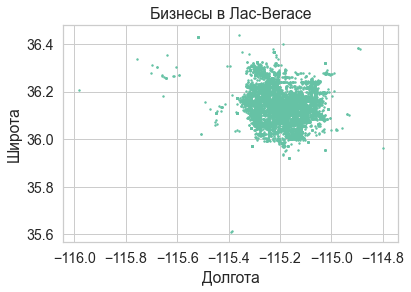

In [8]:
ax = plt.axes()
target_data = target_data[target_data.longitude.between(-116, -114) & target_data.latitude.between(35, 40)] 
ax.scatter(target_data.longitude, target_data.latitude, s=2)
ax.set_xlabel("Долгота")
ax.set_ylabel("Широта")
ax.set_title("Бизнесы в Лас-Вегасе")

Интересно, что увеличив масштам и уменьшив точки, мы можем заметить улицы, вдоль которых расположены бизнесы.

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [9]:
reviews = pd.read_csv("yelp_review.csv")
reviews

,Unnamed: 0,business_id,stars
0,0,AEx2SYEUJmTxVVB18LlCwA,5
1,1,VR6GpWIda3SfvPC-lg9H3w,5
2,2,CKC0-MOWMqoeWf6s-szl8g,5
3,3,ACFtxLv8pGrrxMm6EgjreA,4
4,4,s2I_Ni76bjJNK9yG60iD-Q,4
...,...,...,...
5261663,5261663,Ngk84Ax1tXgpoJFEGxot3w,1
5261664,5261664,pOEL97ld-FJMKO8Ki8JmYg,3
5261665,5261665,5ubokMNw8qfbX2WtxgJG1Q,4
5261666,5261666,EO3i5kTUG7_S2OIQ23sdSA,3


В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [10]:
target_reviews = reviews.set_index("business_id").loc[target_data["business_id"]].reset_index()
target_reviews = target_reviews.reindex(columns=["business_id", "stars"])
target_reviews

,business_id,stars
0,kCoE3jvEtg6UVz5SOD3GVw,4
1,kCoE3jvEtg6UVz5SOD3GVw,1
2,kCoE3jvEtg6UVz5SOD3GVw,5
3,kCoE3jvEtg6UVz5SOD3GVw,5
4,kCoE3jvEtg6UVz5SOD3GVw,5
...,...,...
1603437,9ouC6BpmjFpLfHeQnLQqng,5
1603438,9ouC6BpmjFpLfHeQnLQqng,5
1603439,n9a-3YhibkMDUEgncIivHg,5
1603440,n9a-3YhibkMDUEgncIivHg,1


Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [11]:
reviews_by_business = target_reviews.groupby("business_id").aggregate([np.mean, np.size])
reviews_by_business

stars      
                            mean  size
business_id                           
--9e1ONYQuAa-CB_Rrw7Tw  4.088904  1451
--DdmeR16TRb3LsjG0ejrQ  3.200000     5
--WsruI0IGEoeRmkErU5Gg  4.928571    14
--Y7NhBKzLTbNliMUX_wfg  4.875000     8
--e8PjCNhEz32pprnPhCwQ  3.473684    19
...                          ...   ...
zzOo9n22fBbKAhbSpMzggA  3.230769    26
zzXuJF6UUT1kgTyCsmgDmQ  5.000000     4
zzjqFOujmM9surbMANZ_ag  5.000000     3
zzsKbL1KMNJqazSqBXskxQ  3.666667     6
zzzaIBwimxVej4tY6qFOUQ  3.432432    37

[26761 rows x 2 columns]

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [12]:
reviews_by_business.columns = ['stars', 'count']

Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

**Note: reviews_by_business - ключевая таблица, которая будет использоваться раз за разом.**

In [13]:
reviews_by_business = target_data.set_index("business_id").join(reviews_by_business)
reviews_by_business = reviews_by_business.reindex(columns=['latitude', 'longitude', 'categories', 'name', 'stars', 'count'])
reviews_by_business

,latitude,longitude,categories,name,stars,count
business_id,,,,,,
kCoE3jvEtg6UVz5SOD3GVw,36.207430,-115.268460,Real Estate Services;Real Estate;Home Services...,"""BDJ Realty""",4.000000,5
OD2hnuuTJI9uotcKycxg1A,36.197484,-115.249660,Shopping;Sporting Goods,"""Soccer Zone""",1.444444,9
VBHEsoXQb2AQ76J9l8h1uQ,36.085051,-115.119421,Shopping;Jewelry;Watch Repair;Local Services,"""Alfredo's Jewelry""",4.739130,23
1Jp_hmPNUZArNqzpbm7B0g,36.056382,-115.269332,Home Services;Lighting Fixtures & Equipment;Lo...,"""Task Electric""",4.450000,20
DPQnTnNw2PJj7DdENM98Cw,36.105196,-115.056880,Nurseries & Gardening;Home & Garden;Shopping,"""Star Nursery""",3.680000,25
...,...,...,...,...,...,...
swjz4q8gI79Ndg4APuHEUA,36.134355,-115.224462,Real Estate Services;Home Services;Property Ma...,"""Stonegate Real Estate Services""",4.466667,15
pUhU5ohYv65g8B47dTXAKA,36.173589,-115.116779,Coffee & Tea;Food,"""Starbucks""",2.400000,35
sH9WsMj8sNTTSAUWv4UEEg,36.055130,-115.243488,Mobile Phone Accessories;Mobile Phones;Electro...,"""Sprint Store""",3.857143,35


Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

Text(0.5, 1.0, 'Оценки бизнесов в Лас-Вегасе')

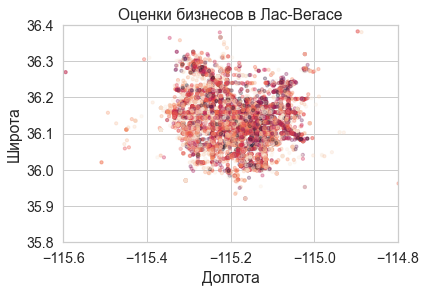

In [14]:
ax = plt.axes()
ax.scatter(reviews_by_business.longitude, reviews_by_business.latitude, c=reviews_by_business.stars, alpha=0.3, s=10)
ax.set_xlabel("Долгота")
ax.set_ylabel("Широта")
ax.set_xlim(-115.6, -114.8)
ax.set_ylim(35.8, 36.4)
ax.set_title("Оценки бизнесов в Лас-Вегасе")

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [15]:
import copy
fineness = 4
reviews_by_area = copy.deepcopy(reviews_by_business)
reviews_by_area.latitude = reviews_by_area.latitude.apply(lambda x: np.round(x * fineness, decimals=1) / fineness)
reviews_by_area.longitude = reviews_by_area.longitude.apply(lambda x: np.round(x * fineness, decimals=1) / fineness)

Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

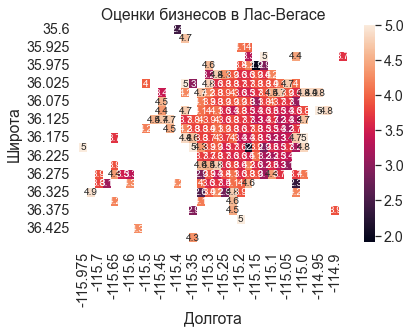

In [16]:
table = pd.pivot_table(reviews_by_area, index="latitude", columns="longitude", values="stars")
plt.axes().clear()
with sns.axes_style('whitegrid'):
    ax = sns.heatmap(table, annot=True)
    ax.set_title("Оценки бизнесов в Лас-Вегасе")
    ax.set_xlabel("Долгота")
    ax.set_ylabel("Широта")

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** **Очевидно, когда в районе мало компаний (крайний случай - 1 компания), то на среднюю по району влияет не местоположение, а качество оказываемых услуг этой самой компанией. Когда компаний становится много, мы верим что этот под-датасет района переймёт все свойства большого датасета(в том числе распределение качества услуг).**

**Ну а по поводу цветовой гаммы - график просто становится визуально не информативным. В крайнем случае без параметров vmin и vmax, а также датасетом: (одна компанию с 5.0 и все остальные в районе 2.0) - получим одноцветный график, анализировать который невозможно.**

**Note: Вообще по хорошему стоит и компании с малым кол-вом оценок выбросить.** 

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

In [19]:
series = reviews_by_area.groupby(["latitude", "longitude"])["count"].count()
series = series[series >= 30]
reviews_by_area = reviews_by_area.reset_index().set_index(["latitude", "longitude"]).loc[series.index]
reviews_by_area = reviews_by_area.reset_index().set_index("business_id")
reviews_by_area.describe()

,latitude,longitude,stars,count
count,25919.000000,25919.000000,25919.000000,25919.000000
mean,36.130790,-115.197780,3.699805,61.067171
std,0.057802,0.066321,1.018964,207.984832
min,36.000000,-115.350000,1.000000,1.000000
25%,36.100000,-115.250000,3.000000,5.000000
50%,36.125000,-115.200000,3.822222,13.000000
75%,36.150000,-115.150000,4.555556,39.000000
max,36.300000,-115.025000,5.000000,7362.000000


**После небольшой магии с индексами (основы которой были даны в условии данного notebook) и получив reviews_by_area с ресторанами из только популярных районов - построим heatmap.**

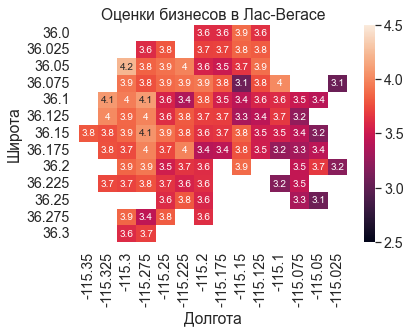

In [20]:
table = pd.pivot_table(reviews_by_area, index="latitude", columns="longitude", values="stars")
plt.axes().clear()
with sns.axes_style('whitegrid'):
    ax = sns.heatmap(table, annot=True, vmax=4.5, vmin=2.5)
    ax.set_title("Оценки бизнесов в Лас-Вегасе")
    ax.set_xlabel("Долгота")
    ax.set_ylabel("Широта")

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** **Относительно предыдущего графика уменьшился рассматриваемый округ(ведь мы отбросили районы), диапазон цветов стал приемлемым. Стало отчётливо видно, что с западной стороны оценки выше. В рассмотренном округе самые высокие средние достигнуты на северо-западе, самые низкие на востоке/юго-востоке. Средняя варьируется между 3 и 4.2.**

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

**Note: соберём всё ранее написанное в функцию show_heatmap и применим её.**

In [21]:
def show_heatmap(reviews, vmin, vmax, title, area_lower_bound):
    fineness = 4
    reviews_by_area = copy.deepcopy(reviews)
    reviews_by_area.latitude = reviews_by_area.latitude.apply(lambda x: np.round(x * fineness, decimals=1) / fineness)
    reviews_by_area.longitude = reviews_by_area.longitude.apply(lambda x: np.round(x * fineness, decimals=1) / fineness)
    series = reviews_by_area.groupby(["latitude", "longitude"])["count"].count()
    series = series[series >= area_lower_bound]
    reviews_by_area = reviews_by_area.reset_index().set_index(["latitude", "longitude"]).loc[series.index]
    reviews_by_area = reviews_by_area.reset_index().set_index("business_id")
    table = pd.pivot_table(reviews_by_area, index="latitude", columns="longitude", values="stars")
    plt.axes().clear()
    with sns.axes_style('whitegrid'):
        ax = sns.heatmap(table, annot=True, vmax=vmax, vmin=vmin)
        ax.set_title(title)
        ax.set_xlabel("Долгота")
        ax.set_ylabel("Широта")

In [22]:
reviews_by_business["is_cafe"] = reviews_by_business["categories"].apply(lambda x: x.lower().find("restaurant") != -1)
reviews_by_restaurant = reviews_by_business[reviews_by_business["is_cafe"] == True]
reviews_by_restaurant = reviews_by_restaurant.drop(columns=["is_cafe"])
reviews_by_restaurant = reviews_by_restaurant[reviews_by_restaurant["count"] >= 5] # Expected table
reviews_by_restaurant.describe()

# show_heatmap(reviews_by_restaurant, 2.5, 4, "Оценки ресторанов в Лас-Вегасе", 10)

,latitude,longitude,stars,count
count,5476.000000,5476.000000,5476.000000,5476.000000
mean,36.129365,-115.193223,3.463319,169.499270
std,0.057755,0.067096,0.765427,368.884602
min,35.920884,-115.679632,1.000000,5.000000
25%,36.100775,-115.242916,3.000000,18.000000
50%,36.124532,-115.177328,3.564660,53.000000
75%,36.159198,-115.146521,4.032205,175.000000
max,36.430308,-114.896028,5.000000,7362.000000


Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** **как и в прошлый раз - убираем нерепрезентативные районы. Делаем heatmap информативным.**

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [48]:
restaraunts_top = reviews_by_restaurant[reviews_by_restaurant["count"] >= 50].sort_values(by="stars", ascending=False).head(10).reindex(columns=["name", "stars", "count", "latitude", "longitude", "categories"])
restaraunts_top

,name,stars,count,latitude,longitude,categories
business_id,,,,,,
iBPyahdJRP5y0t25fF2W9w,"""Lip Smacking Foodie Tours""",4.966480,179,36.114537,-115.172678,Food Tours;Restaurants;Event Planning & Servic...
Fmij544FE1iOruoxI41kew,"""Pepito Shack""",4.907692,65,36.152477,-115.151945,Restaurants;Burgers;Food Stands;Sandwiches;Hot...
qw9SyduMZ53KB6GlBQqvZQ,"""Bosa Boba Cafe""",4.890909,55,36.125960,-115.184846,Vietnamese;Bubble Tea;Sandwiches;Food;Coffee &...
k9b96JXlNewj36ddrce9Jw,"""Garden Grill""",4.868132,91,36.166783,-115.286197,Tacos;Street Vendors;Farmers Market;Vegetarian...
IhNASEZ3XnBHmuuVnWdIwA,"""Brew Tea Bar""",4.848069,1165,36.054195,-115.242443,Cafes;Tea Rooms;Food;Bubble Tea;Restaurants;De...
k5ddmLvAKKw9zSusRPM2cQ,"""Poppa Naps BBQ""",4.836538,104,36.116549,-115.088115,Food Stands;Hot Dogs;Caterers;Restaurants;Amer...
8fFTJBh0RB2EKG53ibiBKw,"""Zenaida's Cafe""",4.833333,180,36.101741,-115.100359,Restaurants;Breakfast & Brunch;Cafes
l1GJnB9TJgGgEeI4at1M0A,"""El Frescos Cocina Mexicana""",4.816754,191,36.098527,-115.148446,Caterers;Mexican;Restaurants;Food;Event Planni...
hFT3HuxVZJb1uYEsYfp-0A,"""Blaqcat Ultra Hookah Lounge""",4.809524,63,36.159742,-115.232738,Adult Entertainment;Lounges;Hookah Bars;Restau...


Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

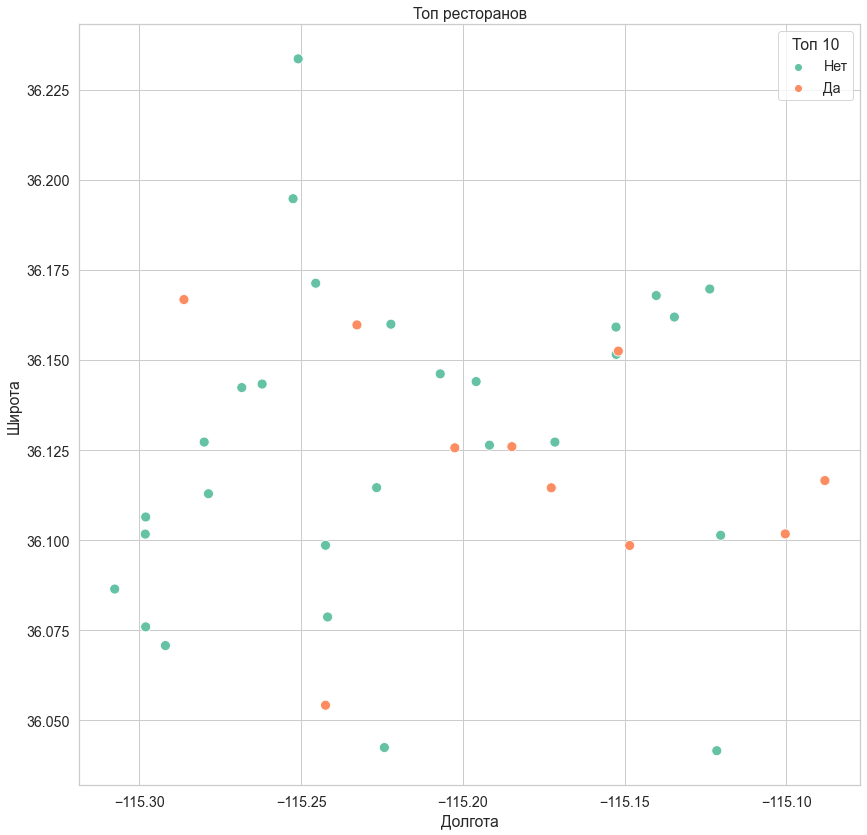

In [49]:
reviews_by_restaurant = reviews_by_restaurant[(reviews_by_restaurant["count"] >= 50) & (reviews_by_restaurant["stars"] >= 4.7)]

new_col_name = "Топ 10"
reviews_by_restaurant[new_col_name] = reviews_by_restaurant["count"].apply(lambda x: "Нет")
reviews_by_restaurant.loc[restaraunts_top.index, new_col_name] = "Да"
with sns.axes_style('whitegrid'):
    ax = sns.scatterplot(data=reviews_by_restaurant, x='longitude', y='latitude', hue=new_col_name, s=100)
    ax.set_title("Топ ресторанов")
    ax.set_xlabel("Долгота")
    ax.set_ylabel("Широта")


Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** **Речь в задаче шла о городе Лас-Вегас. Согласно графикам "restautants/business grades on map" запад/северо-запад - районы с более качественными услугами, опираясь на оценки клиентов. С другой стороны восток/юго-восток предлагают менее качественные услуги, опираясь на оценки клиентов. Кот Василий действительно избирателен, ведь посещает самые известные и хорошо-оценённые рестораны, которые расположены в разных районах. Несмотря на успешность северо-запада в среднем, топовые рестораны расположены и в центре/на востоке также.**

---
### Задача 3.

В данной задаче вам предстоит распарсить сайт, который вы выберите.

**1.** Каждая ссылка (URL) в интернете состоит из нескольких компонент:

* схема, *например, `http` или `https`*,
* хост, *наример, `en.wikipedia.org`*
* путь, по которому находится информация,
* параметры,
* якорь &mdash; указание фрагмента страницы.

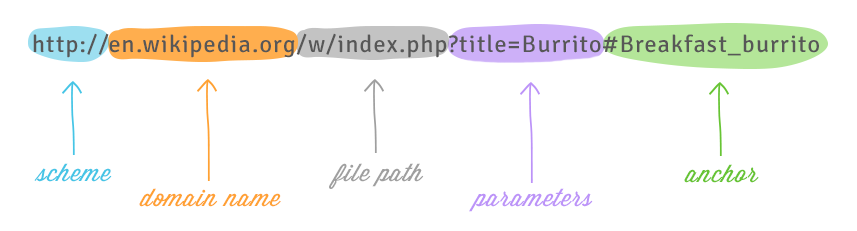

Одна и та же ссылка может иметь несколько форм и вести на ту же самую страницу. Во время обхода сайта это надо учитывать и сохранять один уникальный урл для каждой страницы. Процедура, приводящая урл к каноничному виду, называется нормализацией.
Процедуры, которые применяются к урлу для нормализации, описаны, например, на <a target="_blank" href="https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_URL">Википедии</a>.

Установите пакет `url_normalize`, в котором есть готовая функция для нормализации.

In [228]:
import sys
!{sys.executable} -m pip install url_normalize

You should consider upgrading via the '/opt/homebrew/Cellar/jupyterlab/3.2.9/libexec/bin/python3.9 -m pip install --upgrade pip' command.


Прочитайте, как именно функция `url_normalize` меняет ссылку, и приведите примеры $4$ урлов, которые нормализуются к одному и тому же. Примеры должны демонстрировать различные этапы процедуры нормализации. Одним из этих примеров может быть сам нормализованный урл.

In [58]:
from url_normalize import url_normalize

In [19]:
urls = """
http://example.com/products/?product_id=123
HTTP://EXAMPLE.COM/products/?product_id=123
http://example.com:80/products/?product_id=123
http://example.com/products/./?product_id=123
http://example.com//products/?product_id=123
"""

for url in urls.split('\n'):
    print(url_normalize(url))


http://example.com/products/?product_id=123
http://example.com/products/?product_id=123
http://example.com/products/?product_id=123
http://example.com/products/?product_id=123
http://example.com/products/?product_id=123



_____________
Изучите код, в котором скачиваются страницы сайта `simple.wikipedia.org` с <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/data_parsing.html">занятия про парсинг данных</a> и **скопируйте его в решение данной задачи**. Код, реализующий обход в ширину с фильтрацией и нормализацией урлов, приведён в виде функции.

In [56]:
!{sys.executable} -m pip install bs4
from urllib.parse import urlparse, urldefrag, urljoin
from urllib.request import urlopen
from bs4 import BeautifulSoup
from queue import Queue
import time

You should consider upgrading via the '/opt/homebrew/Cellar/jupyterlab/3.2.9/libexec/bin/python3.9 -m pip install --upgrade pip' command.


Готовые функции для парсинга html/url:

In [60]:
def download_from_the_internet(url):
    '''Скачивает сраницу с интернета

    Параметры:
        url (str) - ссылка на страницу для скачивания

    Возвращает:
        str - html-страница в виде строки, None в случае неудачи
    '''
    try:
        return urlopen(url).read().decode('utf-8')
    except KeyboardInterrupt:
        raise
    except:
        return None

    
def extract_links_from_html(url, html):
    '''Парсит ссылки на странице

    Принимает:
        url (str) - исходный урл страницы
        html (str) - содержание html-страницы

    Возвращает:
        list - список ссылок, находящихся на странице
    '''
    parser = BeautifulSoup(html)
    # Формируем ссылки на те страницы, на которые ссылается документ
    return [urljoin(url, link.get('href')) for link in parser.findAll('a')]


def extract_text_info_from_html(html):
    '''Парсит текстовую информацию на странице

    Принимает:
         html (str) - содержание html-страницы

    Возвращает:
        dict - текстовая часть страницы по ключу text,
               название по ключу title
    '''
    soup = BeautifulSoup(html, features="html.parser")
    for script in soup(["script", "style"]):
        script.extract()
    
    # Объединяем строки текста
    text = soup.get_text()
    lines = (line.strip() for line in text.splitlines())
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    text = '\n'.join(chunk for chunk in chunks if chunk)

    # Находим название на странице
    title = soup.find('title').string
    
    return {'text': text, 'title': title}
    

Код обхода в ширину:

In [163]:
def load_web_pages(seed, max_downloads, url_filtration,
                   soft_html_filtration, hard_html_filtration):    
    # Создаём список со страницами
    pages_json = []
    
    # Создаём очередь для обхода в ширину
    q = Queue()
    q.put(seed)

    already_visited = set()
    n_downloads = 0
    time_start = time.time()

    while not q.empty():
        # Нормализуем урл
        main_url = url_normalize(q.get())
        try:
            if main_url in already_visited:
                continue
            already_visited.add(main_url)
            html = download_from_the_internet(main_url)
        
            # Извлекаем ссылки из страницы
            children_links = extract_links_from_html(main_url, html)
            time.sleep(1)

            # Извлекаем текст страницы
            text_info = extract_text_info_from_html(html) 

            # Добавляем запись в таблицу
            text_info['url'] = main_url
            hardOK = hard_html_filtration(text_info)
            softOK = soft_html_filtration(text_info)
            if ((not hardOK) and (not softOK)):
                continue
            '''В этом месте я хотел if (hardOK) -> pages.append(...),
            но будущие задания требуют всех данных, так что ничего.'''
            pages_json.append(text_info)
            print(f"Status {n_downloads},\nPage: {main_url}\nAdded: {hardOK}\n")
        
            n_downloads += 1
            if n_downloads > max_downloads:
                break
            
            # Добавляем ещё не посещённые ссылки в очередь
            for child in children_links:
                # print(f"Child: {child}")
                if (url_normalize(child) not in already_visited)\
                        and url_filtration(child):
                    # print("Put")
                    q.put(child)
        except Exception as ex:
            print(f"-------EXCEPTION-------\n{ex}\n")
            continue
    return pages_json

In [164]:
def is_wiki_article(url):
    if 'simple.wikipedia' not in url:
        return False
    
    prohibited = ['Category', 'Special', 'Wikipedia',
                  'php', 'Help']
    
    # Проверяем, есть ли запрещённые строки в ссылке
    for token in prohibited:
        if token in url:
            return False
        
    return True

MAX_DOWNLOADS = 1
SEED = "https://simple.wikipedia.org/wiki/Data_science"

df = pd.DataFrame(load_web_pages(SEED, MAX_DOWNLOADS, is_wiki_article, lambda x: True, lambda x: True))
list(df["url"])


Status 0,
Page: https://simple.wikipedia.org/wiki/Data_science
Added: True

Status 1,
Page: https://simple.wikipedia.org/wiki/Data_science#mw-head
Added: True



['https://simple.wikipedia.org/wiki/Data_science',
 'https://simple.wikipedia.org/wiki/Data_science#mw-head']

**Кажется, нужно поправить реализацию, ведь url_normalize не приводит две эти ссылки к одному виду.**

**2.** Выберите достаточно крупный сайт, который вам интересен, а также некоторую категорию страниц в нём. Поймите, с какой страницы сайта надо начать обход, чтобы обходить сайты данной категории.

*Пример: ищем статьи про Data Science на Википедии, начинаем со статьи Data Dcience*.

**Укажите, что выбрали:** Ищем странички википедии про войны, в которых фигурировала Россия.

Придумайте критерий, который по тексту из HTML-страницы будет определять, находится ли страница в определённой вами категории.

*Пример: статья на Википедии про Data Science, если в ней есть слово "data" или термины из статистики, теории вероятностей и анализа данных*.

**Опишите критерий:**
Я выбрал трёх-факторный критерий (то есть немного поменял исходную функцию парсинга, добавив ей аргументов. Изменение этой функции неизбежно - ловить исключения и логировать состояние - важно)
1. Если ссылка содержит # ? & % File ( .jpg, то мы даже не рассматриваем её. *За это отвечает url_filter.*

2. Если на сайте есть некоторые из слов "warrior", "battle", "weapon", "conflict", "military", "forces", то рассмотрим эту страницу как промежуточный узел(т.е. будем искать ссылки на ней), но её саму в ответ не добавим. *За это отвечает soft_html_filter*

3. Если на сайте есть слова "war" И "russia", а также в url лежит слово "war", то сочтём что это нужная нам страница. *За это отвечает hard_html_filter*
 
Такой подход позволяет не рассматривать лишнее, но и не терять "нить" с помощью промежуточных страниц.
 
Начав с выбранной страницы, скачайте не менее $500$ страниц сайта. В качестве функции фильтрации возьмите функцию, которая отделяет страницы с выбранного сайта от других.

In [165]:
raise Exception("Do not launch")

def url_filter(url):    
    if 'en.wikipedia.org' not in url:
        return False  
    
    accepted = []
    
    for token in accepted:
        if token in url:
            return True
    
    prohibited = ["#", "?", "&", "%", "File", "(", ".jpg"]
    
    for token in prohibited:
        if token in url:
            return False
    
    return True

def soft_html_filter(html_object):
    accepted = ["warrior","battle", "weapon",
                "conflict", "military", "forces"]
    for token in accepted:
        if token in html_object["text"].lower():
            return True
    return False

def hard_html_filter(html_object):
    accepted_text = ["war", "russia"]
    for token in accepted_text:
        if token not in html_object["text"].lower():
            return False
    accepted_url = ["war"]
    for token in accepted_url:
        if token not in html_object["url"].lower():
            return False
    return True
    
MAX_DOWNLOADS = 500
SEED = "https://en.wikipedia.org/wiki/War"

df = pd.DataFrame(load_web_pages(SEED, MAX_DOWNLOADS, url_filter,
                                    soft_html_filter, hard_html_filter))
df

Status 0,
Page: https://en.wikipedia.org/wiki/War
Added: True

Status 1,
Page: https://en.wikipedia.org/wiki/Conflict_Zone
Added: False

Status 2,
Page: https://en.wikipedia.org/wiki/Stele_of_the_Vultures
Added: False

Status 3,
Page: https://en.wikipedia.org/wiki/Battle_of_Hastings
Added: False

Status 4,
Page: https://en.wikipedia.org/wiki/Retreat_from_Moscow
Added: False

Status 5,
Page: https://en.wikipedia.org/wiki/Battle_of_the_Somme
Added: False

Status 6,
Page: https://en.wikipedia.org/wiki/Normandy_landings
Added: False

Status 7,
Page: https://en.wikipedia.org/wiki/Nuclear_weapon
Added: False

Status 8,
Page: https://en.wikipedia.org/wiki/Military_history
Added: False

Status 9,
Page: https://en.wikipedia.org/wiki/Prehistoric_warfare
Added: False

Status 10,
Page: https://en.wikipedia.org/wiki/Ancient_warfare
Added: False

Status 11,
Page: https://en.wikipedia.org/wiki/Medieval_warfare
Added: True

Status 12,
Page: https://en.wikipedia.org/wiki/Early_modern_warfare
Added: Tru

Status 106,
Page: https://en.wikipedia.org/wiki/Military_branch
Added: False

Status 107,
Page: https://en.wikipedia.org/wiki/Military_policy
Added: False

Status 108,
Page: https://en.wikipedia.org/wiki/Military_education_and_training
Added: False

Status 109,
Page: https://en.wikipedia.org/wiki/Military_service
Added: False

Status 110,
Page: https://en.wikipedia.org/wiki/Military_sociology
Added: False

Status 111,
Page: https://en.wikipedia.org/wiki/Military_organization
Added: False

Status 112,
Page: https://en.wikipedia.org/wiki/Command_hierarchy
Added: False

Status 113,
Page: https://en.wikipedia.org/wiki/Command_and_control
Added: False

Status 114,
Page: https://en.wikipedia.org/wiki/Military_doctrine
Added: False

Status 115,
Page: https://en.wikipedia.org/wiki/Military_engineering
Added: False

Status 116,
Page: https://en.wikipedia.org/wiki/Military_intelligence
Added: False

Status 117,
Page: https://en.wikipedia.org/wiki/Military_rank
Added: False

Status 118,
Page: htt

Status 209,
Page: https://en.wikipedia.org/wiki/Atom_bomb
Added: False

Status 210,
Page: https://en.wikipedia.org/wiki/Albert_Einstein
Added: False

Status 211,
Page: https://en.wikipedia.org/wiki/Mao_Zedong
Added: False

Status 212,
Page: https://en.wikipedia.org/wiki/Nuclear_war
Added: True

Status 213,
Page: https://en.wikipedia.org/wiki/Indo-Pakistani_War_of_1971
Added: True

Status 214,
Page: https://en.wikipedia.org/wiki/Gulf_War
Added: True

Status 215,
Page: https://en.wikipedia.org/wiki/Human_Security_Report_2005
Added: False

Status 216,
Page: https://en.wikipedia.org/wiki/Cold_War
Added: True

Status 217,
Page: https://en.wikipedia.org/wiki/Australian_4th_Division
Added: False

Status 218,
Page: https://en.wikipedia.org/wiki/Chemical_weapons_in_World_War_I
Added: True

Status 219,
Page: https://en.wikipedia.org/wiki/Third_Battle_of_Ypres
Added: False

Status 220,
Page: https://en.wikipedia.org/wiki/Belligerent
Added: False

Status 221,
Page: https://en.wikipedia.org/wiki/Wo

Status 313,
Page: https://en.wikipedia.org/wiki/Natural_resource
Added: False

Status 314,
Page: https://en.wikipedia.org/wiki/State-building
Added: False

Status 315,
Page: https://en.wikipedia.org/wiki/Fiscal_capacity
Added: False

Status 316,
Page: https://en.wikipedia.org/wiki/Presidents_of_the_United_States
Added: False

Status 317,
Page: https://en.wikipedia.org/wiki/General_officer
Added: False

Status 318,
Page: https://en.wikipedia.org/wiki/Marxist_explanations_of_warfare
Added: True

Status 319,
Page: https://en.wikipedia.org/wiki/Marxism
Added: False

Status 320,
Page: https://en.wikipedia.org/wiki/Imperialism
Added: False

Status 321,
Page: https://en.wikipedia.org/wiki/Capitalism
Added: False

Status 322,
Page: https://en.wikipedia.org/wiki/Karl_Kautsky
Added: False

Status 323,
Page: https://en.wikipedia.org/wiki/Rosa_Luxemburg
Added: False

Status 324,
Page: https://en.wikipedia.org/wiki/Rudolf_Hilferding
Added: False

Status 325,
Page: https://en.wikipedia.org/wiki/Vlad

Status 416,
Page: https://en.wikipedia.org/wiki/Category:War
Added: False

Status 417,
Page: https://en.wikipedia.org/wiki/Category:Civil_wars
Added: False

Status 418,
Page: https://en.wikipedia.org/wiki/List_of_civil_wars
Added: True

Status 419,
Page: https://en.wikipedia.org/wiki/Category:Attacks
Added: False

Status 420,
Page: https://en.wikipedia.org/wiki/Category:Lists_of_attacks
Added: False

Status 421,
Page: https://en.wikipedia.org/wiki/Category:Terrorism_by_form
Added: False

Status 422,
Page: https://en.wikipedia.org/wiki/List_of_terrorist_incidents
Added: False

Status 423,
Page: https://en.wikipedia.org/wiki/Category:Massacres
Added: False

Status 424,
Page: https://en.wikipedia.org/wiki/List_of_events_named_massacres
Added: False

Status 425,
Page: https://en.wikipedia.org/wiki/Category:Warfare
Added: False

Status 426,
Page: https://en.wikipedia.org/wiki/Category:Battles
Added: False

Status 427,
Page: https://en.wikipedia.org/wiki/Category:Lists_of_battles
Added: Fals

,text,title,url
0,"War - Wikipedia\nWar\nFrom Wikipedia, the free...",War - Wikipedia,https://en.wikipedia.org/wiki/War
1,Conflict Zone - Wikipedia\nConflict Zone\nFrom...,Conflict Zone - Wikipedia,https://en.wikipedia.org/wiki/Conflict_Zone
2,Stele of the Vultures - Wikipedia\nStele of th...,Stele of the Vultures - Wikipedia,https://en.wikipedia.org/wiki/Stele_of_the_Vul...
3,Battle of Hastings - Wikipedia\nBattle of Hast...,Battle of Hastings - Wikipedia,https://en.wikipedia.org/wiki/Battle_of_Hastings
4,French invasion of Russia - Wikipedia\nFrench ...,French invasion of Russia - Wikipedia,https://en.wikipedia.org/wiki/Retreat_from_Moscow
...,...,...,...
496,Video game genre - Wikipedia\nVideo game genre...,Video game genre - Wikipedia,https://en.wikipedia.org/wiki/Video_game_genre
497,Real-time strategy - Wikipedia\nReal-time stra...,Real-time strategy - Wikipedia,https://en.wikipedia.org/wiki/Real_time_strategy
498,Single-player video game - Wikipedia\nSingle-p...,Single-player video game - Wikipedia,https://en.wikipedia.org/wiki/Single_player
499,Multiplayer video game - Wikipedia\nMultiplaye...,Multiplayer video game - Wikipedia,https://en.wikipedia.org/wiki/Multiplayer_vide...


Cделайте `pandas`-таблицу со следующей информацией:

* количество слов в тексте статьи;
* принадлежит ли страница выбранной категории.

Для последнего пункта можете воспользоваться функцией поиска слов по заданным префиксам, рассмотренной на <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/data_parsing.html">занятии</a>.

*Скопируем наш датасет, чтобы потом всё можно было починить, ибо снова парсить - долго.*

In [253]:
import copy
work_df = copy.deepcopy(df)

Немного изменим наш hard_html_filter - разделим его на две функции, как требует apply.

In [254]:
def hard_url_filter(url):
    accepted_url = ["war"]
    for token in accepted_url:
        if token not in url.lower():
            return False
    return True

def hard_text_filter(text):
    accepted_text = ["war", "russia"]
    for token in accepted_text:
        if token not in text.lower():
            return False
    return True

Выполним задание

In [255]:
work_df['nice_text'] = work_df["text"].apply(hard_text_filter)
work_df['nice_url'] = work_df["url"].apply(hard_url_filter)
work_df['is_target'] = work_df["nice_url"] & work_df["nice_text"]
work_df['words'] = work_df["text"].apply(lambda x: len(x.split()))
work_df = work_df.reindex(columns=['words', 'is_target'])
work_df

,words,is_target
0,11321,True
1,1150,False
2,3002,False
3,8800,False
4,16290,False
...,...,...
496,2778,False
497,7361,False
498,1598,False
499,2985,False


Определите, какой процент скачанных страниц принадлежит выбранной категории?

In [256]:
100 * work_df.groupby(by="is_target").count().loc[True].loc["words"] / len(work_df.index)

16.167664670658684

C помощью гистограмм сравните визуально распределения количества слов в статьях из выбранной категории и во всех остальных. Для этих двух распределений вычислите средние, медианы и дисперсии. Средние и медианы отобразите на графиках с гистограммами. Сделайте выводы.

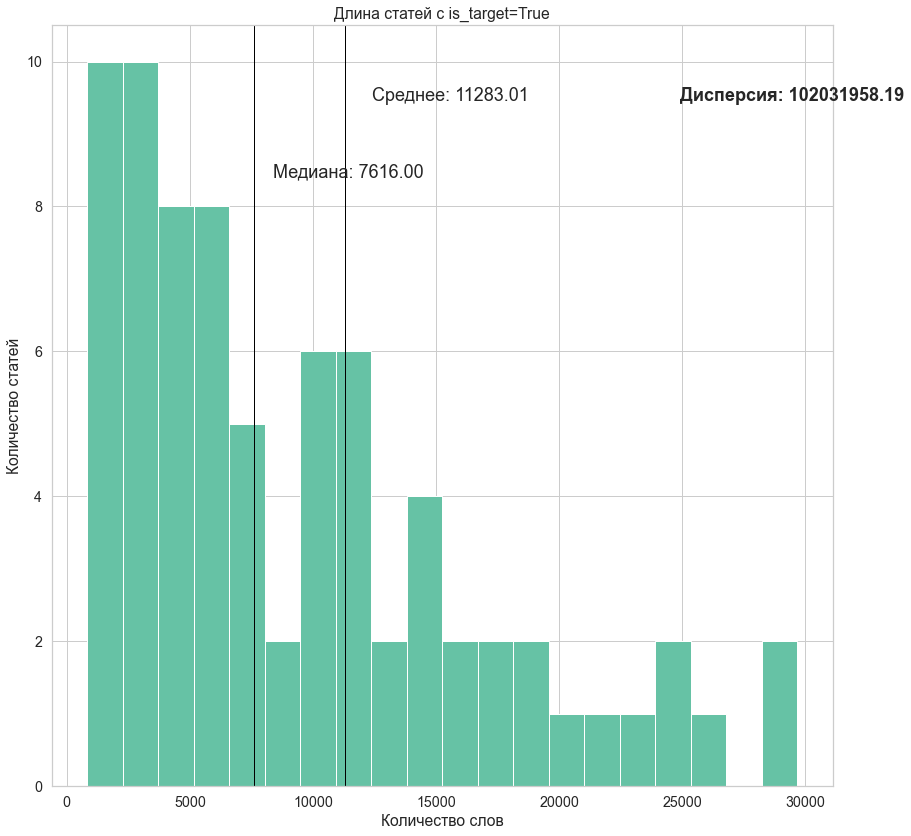

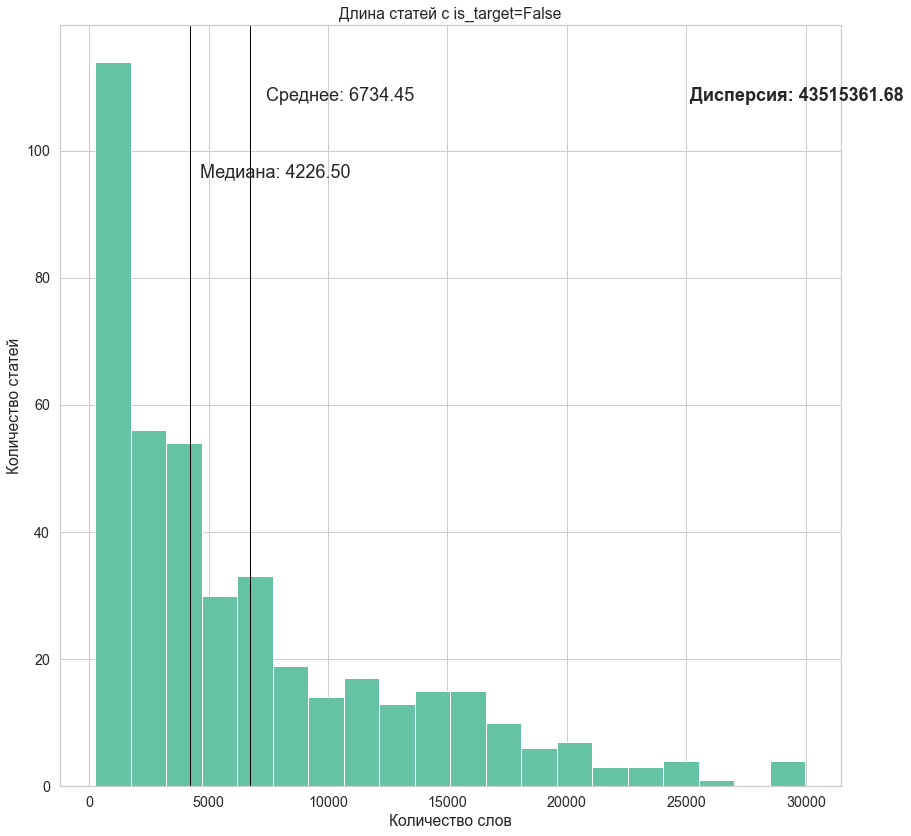

In [297]:
for attr in [True, False]:
    fig, ax = plt.subplots()
    data = work_df[work_df["is_target"] == attr]["words"]
    ax.hist(data[data < 30000], bins=20)
    ax.set_title(f"Длина статей с is_target={attr}")
    ax.set_xlabel("Количество слов")
    ax.set_ylabel("Количество статей")
    min_ylim, max_ylim = plt.ylim()
    height = 0.9
    for value, text in zip([data.mean(), data.median()],
                           ["Среднее", "Медиана"]):
        plt.axvline(value, color='black', linestyle='solid', linewidth=1)
        plt.text(value*1.1, max_ylim*height,
            text + ': {:.2f}'.format(value), fontdict={'size': 18})
        height -= 0.1
    plt.text(plt.xlim()[1]*0.8, 0.9*max_ylim, 
             'Дисперсия: {:.2f}'.format(data.var()), fontdict={'size': 18, 'weight': 'bold'})

**Вывод:** графики в целом схожи, превалируют короткие статьи. В среднем статьи про войны связанные с Россией длиннее, чем остальные полученные статьи.


Постройте boxplot-графики для того, чтобы сравнить эти 2 распределения. Какой способ сравнения кажется вам более удобным?

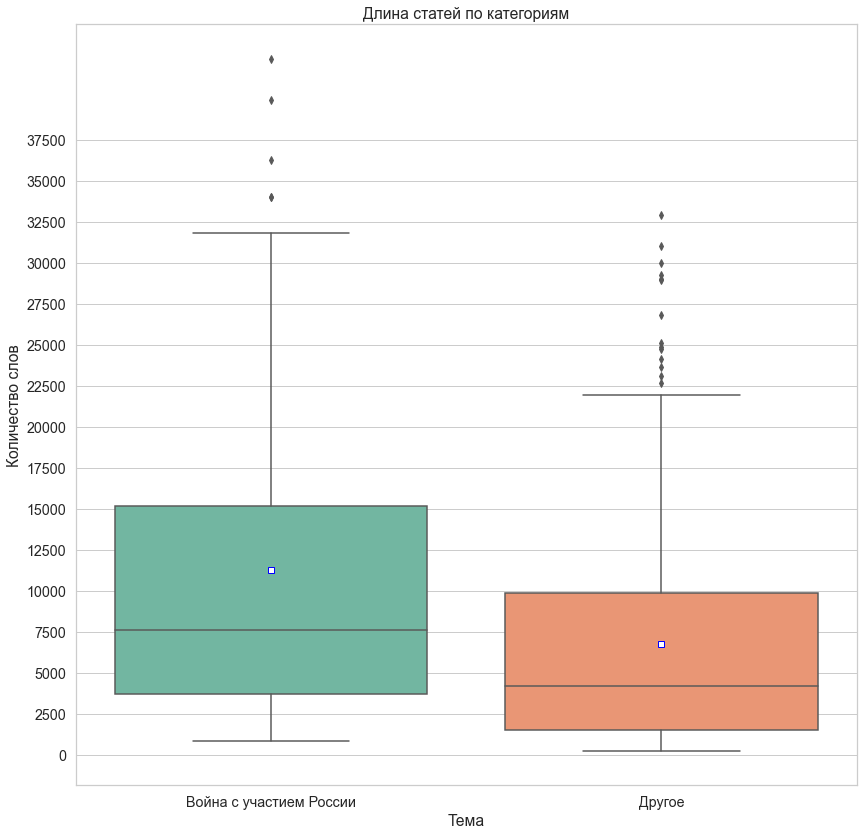

In [311]:
with sns.axes_style('whitegrid'):
    # plt.title("Длина статей по категориям")
    work_df["topic"] = work_df["is_target"].apply(lambda x: ("Война с участием России" if x else "Другое"))
    ax = sns.boxplot(data=work_df, x='topic', y='words', showmeans=True,
                     meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
    del work_df["topic"]
    ax.set_yticks(np.arange(0, 40000, 2500))
    ax.set_title("Длина статей по категориям")
    ax.set_xlabel("Тема")
    ax.set_ylabel("Количество слов")

**Вывод:** Boxplot анализировать проще (особенно, если категорий больше 2), в том числе потому, что можно сравнивать медианы/среднее и т.п.

In [316]:
result1 = copy.deepcopy(work_df)
# Сохраним результат

**3.** Визуализируйте скачанные страницы сайта. В качестве значений по осям возьмите количество слов на странице и количество ссылок на ней. Цветом обозначьте принадлежность выбранной вами категории. 

Поскольку это невозможно с нашей нынешней реализацией, то перепишем функции и снова запарсим.

In [54]:
import time
def load_web_pages(seed, max_downloads, url_filtration,
                   soft_html_filtration, hard_html_filtration):    
    # Создаём список со страницами
    pages_json = []
    
    # Создаём очередь для обхода в ширину
    q = Queue()
    q.put((seed, 0))

    already_visited = set()
    n_downloads = 0
    time_start = time.time()

    while not q.empty():
        # Нормализуем урл
        url, depth = q.get()
        try:
            main_url = url_normalize(url)
            if main_url in already_visited:
                continue
            already_visited.add(main_url)
            start = time.time()
            html = download_from_the_internet(main_url)
            end = time.time()
            # Извлекаем ссылки из страницы
            children_links = extract_links_from_html(main_url, html)
            time.sleep(1)

            # Извлекаем текст страницы
            text_info = extract_text_info_from_html(html) 

            # Добавляем запись в таблицу
            text_info['url'] = main_url
            text_info['depth'] = depth
            text_info['links'] = len(children_links)
            text_info['time'] = end - start
            hardOK = hard_html_filtration(text_info)
            softOK = soft_html_filtration(text_info)
            if ((not hardOK) and (not softOK)):
                continue
            '''В этом месте я хотел if (hardOK) -> pages.append(...),
            но будущие задания требуют всех данных, так что ничего.'''
            pages_json.append(text_info)
            print(f"Status {n_downloads},\nPage: {main_url}\nAdded: {hardOK}\n")
        
            n_downloads += 1
            if n_downloads > max_downloads:
                break
            
            # Добавляем ещё не посещённые ссылки в очередь
            for child in children_links:
                if (url_normalize(child) not in already_visited)\
                        and url_filtration(child):
                    q.put((child, depth + 1))
        except Exception as ex:
            print(f"-------EXCEPTION-------\n{ex}\n")
            continue
    return pages_json

In [314]:
raise Exception("Do not launch")

MAX_DOWNLOADS = 500
SEED = "https://en.wikipedia.org/wiki/War"

df = pd.DataFrame(load_web_pages(SEED, MAX_DOWNLOADS, url_filter,
                                    soft_html_filter, hard_html_filter))
df.head(5)

Status 0,
Page: https://en.wikipedia.org/wiki/War
Added: True

Status 1,
Page: https://en.wikipedia.org/wiki/Conflict_Zone
Added: False

Status 2,
Page: https://en.wikipedia.org/wiki/Stele_of_the_Vultures
Added: False

Status 3,
Page: https://en.wikipedia.org/wiki/Battle_of_Hastings
Added: False

Status 4,
Page: https://en.wikipedia.org/wiki/Retreat_from_Moscow
Added: False

Status 5,
Page: https://en.wikipedia.org/wiki/Battle_of_the_Somme
Added: False

Status 6,
Page: https://en.wikipedia.org/wiki/Normandy_landings
Added: False

Status 7,
Page: https://en.wikipedia.org/wiki/Nuclear_weapon
Added: False

Status 8,
Page: https://en.wikipedia.org/wiki/Military_history
Added: False

Status 9,
Page: https://en.wikipedia.org/wiki/Prehistoric_warfare
Added: False

Status 10,
Page: https://en.wikipedia.org/wiki/Ancient_warfare
Added: False

Status 11,
Page: https://en.wikipedia.org/wiki/Medieval_warfare
Added: True

Status 12,
Page: https://en.wikipedia.org/wiki/Early_modern_warfare
Added: Tru

Status 106,
Page: https://en.wikipedia.org/wiki/Military_branch
Added: False

Status 107,
Page: https://en.wikipedia.org/wiki/Military_policy
Added: False

Status 108,
Page: https://en.wikipedia.org/wiki/Military_education_and_training
Added: False

Status 109,
Page: https://en.wikipedia.org/wiki/Military_service
Added: False

Status 110,
Page: https://en.wikipedia.org/wiki/Military_sociology
Added: False

Status 111,
Page: https://en.wikipedia.org/wiki/Military_organization
Added: False

Status 112,
Page: https://en.wikipedia.org/wiki/Command_hierarchy
Added: False

Status 113,
Page: https://en.wikipedia.org/wiki/Command_and_control
Added: False

Status 114,
Page: https://en.wikipedia.org/wiki/Military_doctrine
Added: False

Status 115,
Page: https://en.wikipedia.org/wiki/Military_engineering
Added: False

Status 116,
Page: https://en.wikipedia.org/wiki/Military_intelligence
Added: False

Status 117,
Page: https://en.wikipedia.org/wiki/Military_rank
Added: False

Status 118,
Page: htt

Status 209,
Page: https://en.wikipedia.org/wiki/Atom_bomb
Added: False

Status 210,
Page: https://en.wikipedia.org/wiki/Albert_Einstein
Added: False

Status 211,
Page: https://en.wikipedia.org/wiki/Mao_Zedong
Added: False

Status 212,
Page: https://en.wikipedia.org/wiki/Nuclear_war
Added: True

Status 213,
Page: https://en.wikipedia.org/wiki/Indo-Pakistani_War_of_1971
Added: True

Status 214,
Page: https://en.wikipedia.org/wiki/Gulf_War
Added: True

Status 215,
Page: https://en.wikipedia.org/wiki/Human_Security_Report_2005
Added: False

Status 216,
Page: https://en.wikipedia.org/wiki/Cold_War
Added: True

Status 217,
Page: https://en.wikipedia.org/wiki/Australian_4th_Division
Added: False

Status 218,
Page: https://en.wikipedia.org/wiki/Chemical_weapons_in_World_War_I
Added: True

Status 219,
Page: https://en.wikipedia.org/wiki/Third_Battle_of_Ypres
Added: False

Status 220,
Page: https://en.wikipedia.org/wiki/Belligerent
Added: False

Status 221,
Page: https://en.wikipedia.org/wiki/Wo

Status 313,
Page: https://en.wikipedia.org/wiki/Natural_resource
Added: False

Status 314,
Page: https://en.wikipedia.org/wiki/State-building
Added: False

Status 315,
Page: https://en.wikipedia.org/wiki/Fiscal_capacity
Added: False

Status 316,
Page: https://en.wikipedia.org/wiki/Presidents_of_the_United_States
Added: False

Status 317,
Page: https://en.wikipedia.org/wiki/General_officer
Added: False

Status 318,
Page: https://en.wikipedia.org/wiki/Marxist_explanations_of_warfare
Added: True

Status 319,
Page: https://en.wikipedia.org/wiki/Marxism
Added: False

Status 320,
Page: https://en.wikipedia.org/wiki/Imperialism
Added: False

Status 321,
Page: https://en.wikipedia.org/wiki/Capitalism
Added: False

Status 322,
Page: https://en.wikipedia.org/wiki/Karl_Kautsky
Added: False

Status 323,
Page: https://en.wikipedia.org/wiki/Rosa_Luxemburg
Added: False

Status 324,
Page: https://en.wikipedia.org/wiki/Rudolf_Hilferding
Added: False

Status 325,
Page: https://en.wikipedia.org/wiki/Vlad

Status 416,
Page: https://en.wikipedia.org/wiki/Category:War
Added: False

Status 417,
Page: https://en.wikipedia.org/wiki/Category:Civil_wars
Added: False

Status 418,
Page: https://en.wikipedia.org/wiki/List_of_civil_wars
Added: True

Status 419,
Page: https://en.wikipedia.org/wiki/Category:Attacks
Added: False

Status 420,
Page: https://en.wikipedia.org/wiki/Category:Lists_of_attacks
Added: False

Status 421,
Page: https://en.wikipedia.org/wiki/Category:Terrorism_by_form
Added: False

Status 422,
Page: https://en.wikipedia.org/wiki/List_of_terrorist_incidents
Added: False

Status 423,
Page: https://en.wikipedia.org/wiki/Category:Massacres
Added: False

Status 424,
Page: https://en.wikipedia.org/wiki/List_of_events_named_massacres
Added: False

Status 425,
Page: https://en.wikipedia.org/wiki/Category:Warfare
Added: False

Status 426,
Page: https://en.wikipedia.org/wiki/Category:Battles
Added: False

Status 427,
Page: https://en.wikipedia.org/wiki/Category:Lists_of_battles
Added: Fals

,text,title,url,depth,links,time
0,"War - Wikipedia\nWar\nFrom Wikipedia, the free...",War - Wikipedia,https://en.wikipedia.org/wiki/War,0,1579,0.456161
1,Conflict Zone - Wikipedia\nConflict Zone\nFrom...,Conflict Zone - Wikipedia,https://en.wikipedia.org/wiki/Conflict_Zone,1,201,0.286110
2,Stele of the Vultures - Wikipedia\nStele of th...,Stele of the Vultures - Wikipedia,https://en.wikipedia.org/wiki/Stele_of_the_Vul...,1,577,0.357884
3,Battle of Hastings - Wikipedia\nBattle of Hast...,Battle of Hastings - Wikipedia,https://en.wikipedia.org/wiki/Battle_of_Hastings,1,1058,0.419137
4,French invasion of Russia - Wikipedia\nFrench ...,French invasion of Russia - Wikipedia,https://en.wikipedia.org/wiki/Retreat_from_Moscow,1,2239,0.467541


In [315]:
result2 = copy.deepcopy(df)

Снова отформатируем нашу таблицу.

In [317]:
work_df = copy.deepcopy(df)
work_df['nice_text'] = work_df["text"].apply(hard_text_filter)
work_df['nice_url'] = work_df["url"].apply(hard_url_filter)
work_df['is_target'] = work_df["nice_url"] & work_df["nice_text"]
work_df['words'] = work_df["text"].apply(lambda x: len(x.split()))
work_df = work_df.reindex(columns=['words', 'is_target', 'depth', 'links', 'time'])
work_df

,words,is_target,depth,links,time
0,11321,True,0,1579,0.456161
1,1150,False,1,201,0.286110
2,3002,False,1,577,0.357884
3,8800,False,1,1058,0.419137
4,16290,False,1,2239,0.467541
...,...,...,...,...,...
496,2778,False,2,574,0.326159
497,7361,False,2,880,0.375559
498,1598,False,2,299,0.313116
499,2985,False,2,561,0.363640


Построим визуализацию.

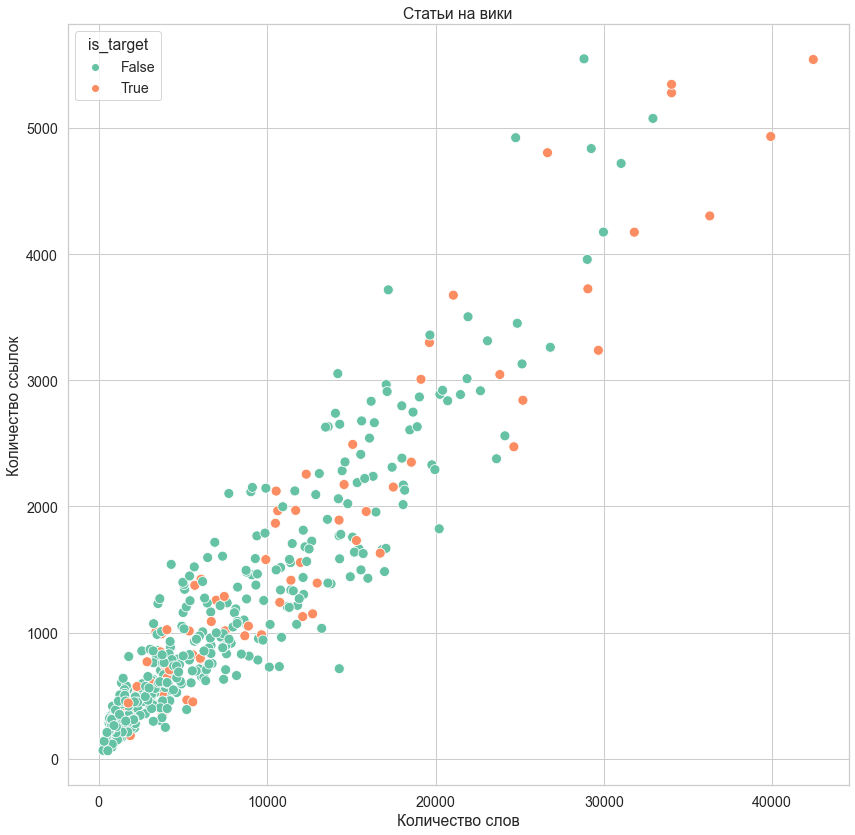

In [324]:
with sns.axes_style('whitegrid'):
    ax = sns.scatterplot(data=work_df, x='words', y='links', hue='is_target', s=100)
    ax.set_title("Статьи на вики")
    ax.set_xlabel("Количество слов")
    ax.set_ylabel("Количество ссылок")

**Вывод:** Видна линейная зависимость. Как-то особенно статьи c Войной про Росиию не выделяются на этом графике.

**4.** Предложите функцию фильтрации web-страниц, которую нужно подать в `load_web_pages`, чтобы среди скачанных сайтов был больше процент страниц из выбранной вами категории.

In [64]:
def url_filter(url):    
    if 'en.wikipedia.org' not in url:
        return False  
    
    accepted = []
    
    for token in accepted:
        if token in url:
            return True
    
    prohibited = ["#", "?", "&", "%", "File", "(", ".jpg"]
    
    for token in prohibited:
        if token in url:
            return False
    
    article = url.split('/')[-1]
    
    prohibited = [':']
    
    for token in prohibited:
        if token in article:
            return False
    
    return True

def soft_html_filter(html_object):
    accepted = ["warrior", "battle", "weapon",
                "conflict", "military", "forces",
                "fighting", "combat", "raid"]
    for token in accepted:
        if token in html_object["text"].lower():
            return True
    return False

def hard_html_filter(html_object):
    accepted_text = ["war", "russia"]
    for token in accepted_text:
        if token not in html_object["text"].lower():
            return False
    accepted_url = ["war", "conflict"]
    for token in accepted_url:
        if token in html_object["url"].lower():
            return True
    
    return False

Скачайте снова не менее $500$ страниц, но уже с новой функцией фильтрации. Добавьте следующую информацию к каждой странице:

* глубина в обходе,
* время скачивания страницы.

Для замера времени можете воспользоваться функцией `time` из пакета `time`.

In [61]:
raise Exception("Do not launch")

MAX_DOWNLOADS = 500
SEED = "https://en.wikipedia.org/wiki/War"

df = pd.DataFrame(load_web_pages(SEED, MAX_DOWNLOADS, url_filter,
                                    soft_html_filter, hard_html_filter))
df

Status 0,
Page: https://en.wikipedia.org/wiki/War
Added: True

Status 1,
Page: https://en.wikipedia.org/wiki/Conflict_Zone
Added: False

Status 2,
Page: https://en.wikipedia.org/wiki/Stele_of_the_Vultures
Added: False

Status 3,
Page: https://en.wikipedia.org/wiki/Battle_of_Hastings
Added: False

Status 4,
Page: https://en.wikipedia.org/wiki/Retreat_from_Moscow
Added: False

Status 5,
Page: https://en.wikipedia.org/wiki/Battle_of_the_Somme
Added: False

Status 6,
Page: https://en.wikipedia.org/wiki/Normandy_landings
Added: False

Status 7,
Page: https://en.wikipedia.org/wiki/Nuclear_weapon
Added: False

Status 8,
Page: https://en.wikipedia.org/wiki/Military_history
Added: False

Status 9,
Page: https://en.wikipedia.org/wiki/Prehistoric_warfare
Added: False

Status 10,
Page: https://en.wikipedia.org/wiki/Ancient_warfare
Added: False

Status 11,
Page: https://en.wikipedia.org/wiki/Medieval_warfare
Added: True

Status 12,
Page: https://en.wikipedia.org/wiki/Early_modern_warfare
Added: Tru

Status 106,
Page: https://en.wikipedia.org/wiki/Military_branch
Added: False

Status 107,
Page: https://en.wikipedia.org/wiki/Military_policy
Added: False

Status 108,
Page: https://en.wikipedia.org/wiki/Military_education_and_training
Added: False

Status 109,
Page: https://en.wikipedia.org/wiki/Military_service
Added: False

Status 110,
Page: https://en.wikipedia.org/wiki/Military_sociology
Added: False

Status 111,
Page: https://en.wikipedia.org/wiki/Military_organization
Added: False

Status 112,
Page: https://en.wikipedia.org/wiki/Command_hierarchy
Added: False

Status 113,
Page: https://en.wikipedia.org/wiki/Command_and_control
Added: False

Status 114,
Page: https://en.wikipedia.org/wiki/Military_doctrine
Added: False

Status 115,
Page: https://en.wikipedia.org/wiki/Military_engineering
Added: False

Status 116,
Page: https://en.wikipedia.org/wiki/Military_intelligence
Added: False

Status 117,
Page: https://en.wikipedia.org/wiki/Military_rank
Added: False

Status 118,
Page: htt

Status 209,
Page: https://en.wikipedia.org/wiki/Nuclear_war
Added: True

Status 210,
Page: https://en.wikipedia.org/wiki/Indo-Pakistani_War_of_1971
Added: True

Status 211,
Page: https://en.wikipedia.org/wiki/Gulf_War
Added: True

Status 212,
Page: https://en.wikipedia.org/wiki/Human_Security_Report_2005
Added: False

Status 213,
Page: https://en.wikipedia.org/wiki/Cold_War
Added: True

Status 214,
Page: https://en.wikipedia.org/wiki/Australian_4th_Division
Added: False

Status 215,
Page: https://en.wikipedia.org/wiki/Chemical_weapons_in_World_War_I
Added: True

Status 216,
Page: https://en.wikipedia.org/wiki/Third_Battle_of_Ypres
Added: False

Status 217,
Page: https://en.wikipedia.org/wiki/Belligerent
Added: False

Status 218,
Page: https://en.wikipedia.org/wiki/World_War_I
Added: True

Status 219,
Page: https://en.wikipedia.org/wiki/Cold_warfare
Added: True

Status 220,
Page: https://en.wikipedia.org/wiki/Covert_operation
Added: False

Status 221,
Page: https://en.wikipedia.org/wiki

Status 313,
Page: https://en.wikipedia.org/wiki/General_officer
Added: False

Status 314,
Page: https://en.wikipedia.org/wiki/Marxist_explanations_of_warfare
Added: True

Status 315,
Page: https://en.wikipedia.org/wiki/Marxism
Added: False

Status 316,
Page: https://en.wikipedia.org/wiki/Imperialism
Added: False

Status 317,
Page: https://en.wikipedia.org/wiki/Capitalism
Added: False

Status 318,
Page: https://en.wikipedia.org/wiki/Karl_Kautsky
Added: False

Status 319,
Page: https://en.wikipedia.org/wiki/Rosa_Luxemburg
Added: False

Status 320,
Page: https://en.wikipedia.org/wiki/Rudolf_Hilferding
Added: False

Status 321,
Page: https://en.wikipedia.org/wiki/Vladimir_Lenin
Added: False

Status 322,
Page: https://en.wikipedia.org/wiki/Means_of_production
Added: False

Status 323,
Page: https://en.wikipedia.org/wiki/Consumer_demand
Added: False

Status 324,
Page: https://en.wikipedia.org/wiki/Capitalist_economy
Added: False

Status 325,
Page: https://en.wikipedia.org/wiki/Unified_Task_F

Status 415,
Page: https://en.wikipedia.org/wiki/Non-Aligned_Movement
Added: False

Status 416,
Page: https://en.wikipedia.org/wiki/NATO
Added: False

Status 417,
Page: https://en.wikipedia.org/wiki/Shanghai_Cooperation_Organisation
Added: False

Status 418,
Page: https://en.wikipedia.org/wiki/United_Nations
Added: False

Status 419,
Page: https://en.wikipedia.org/wiki/Warsaw_Pact
Added: True

Status 420,
Page: https://en.wikipedia.org/wiki/Political_history_of_the_world
Added: False

Status 421,
Page: https://en.wikipedia.org/wiki/Diplomatic_history_of_World_War_II
Added: True

Status 422,
Page: https://en.wikipedia.org/wiki/International_relations_since_1989
Added: False

Status 423,
Page: https://en.wikipedia.org/wiki/Appeasement
Added: False

Status 424,
Page: https://en.wikipedia.org/wiki/Collective_security
Added: False

Status 425,
Page: https://en.wikipedia.org/wiki/Colonialism
Added: False

Status 426,
Page: https://en.wikipedia.org/wiki/Hegemony
Added: False

Status 427,
Page:

,text,title,url,depth,links,time
0,"War - Wikipedia\nWar\nFrom Wikipedia, the free...",War - Wikipedia,https://en.wikipedia.org/wiki/War,0,1579,0.431643
1,Conflict Zone - Wikipedia\nConflict Zone\nFrom...,Conflict Zone - Wikipedia,https://en.wikipedia.org/wiki/Conflict_Zone,1,201,0.273327
2,Stele of the Vultures - Wikipedia\nStele of th...,Stele of the Vultures - Wikipedia,https://en.wikipedia.org/wiki/Stele_of_the_Vul...,1,577,0.612042
3,Battle of Hastings - Wikipedia\nBattle of Hast...,Battle of Hastings - Wikipedia,https://en.wikipedia.org/wiki/Battle_of_Hastings,1,1058,0.356594
4,French invasion of Russia - Wikipedia\nFrench ...,French invasion of Russia - Wikipedia,https://en.wikipedia.org/wiki/Retreat_from_Moscow,1,2239,0.420102
...,...,...,...,...,...,...
496,Land grant to Marduk-apla-iddina I by Meli-Shi...,Land grant to Marduk-apla-iddina I by Meli-Shi...,https://en.wikipedia.org/wiki/Land_grant_to_Ma...,2,511,0.308160
497,Land grant to Munnabittu kudurru - Wikipedia\n...,Land grant to Munnabittu kudurru - Wikipedia,https://en.wikipedia.org/wiki/Land_grant_to_Mu...,2,518,0.310945
498,Lion of Mari - Wikipedia\nLion of Mari\nFrom W...,Lion of Mari - Wikipedia,https://en.wikipedia.org/wiki/Lion_of_Mari,2,481,0.306115
499,Manishtushu Obelisk - Wikipedia\nManishtushu O...,Manishtushu Obelisk - Wikipedia,https://en.wikipedia.org/wiki/Manishtushu_Obelisk,2,532,0.312592


In [62]:
result3 = copy.deepcopy(df)

Вновь отформатируем таблицу и посчитаем успешность.

In [66]:
def hard_url_filter(url):
    accepted_url = ["war", "conflict"]
    for token in accepted_url:
        if token in url.lower():
            return True
    return False

def hard_text_filter(text):
    accepted_text = ["war", "russia"]
    for token in accepted_text:
        if token not in text.lower():
            return False
    return True

work_df = copy.deepcopy(df)
work_df['nice_text'] = work_df["text"].apply(hard_text_filter)
work_df['nice_url'] = work_df["url"].apply(hard_url_filter)
work_df['is_target'] = work_df["nice_url"] & work_df["nice_text"]
work_df['words'] = work_df["text"].apply(lambda x: len(x.split()))
work_df = work_df.reindex(columns=['words', 'is_target', 'depth', 'links', 'time'])
100 * work_df.groupby(by="is_target").count().loc[True].loc["words"] / len(work_df.index)

16.56686626746507

Так или иначе - процент колеблется около 16. Вероятно, потому что количество Войн с Россией не исчисляется сотнями.

Постройте гистограмму для времени скачивания страницы.

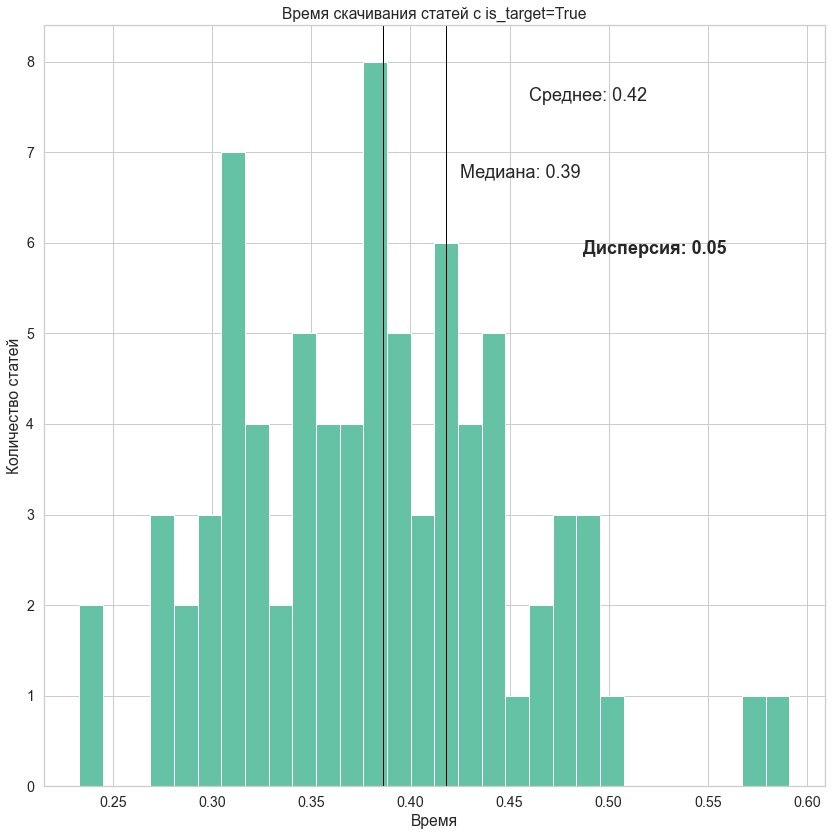

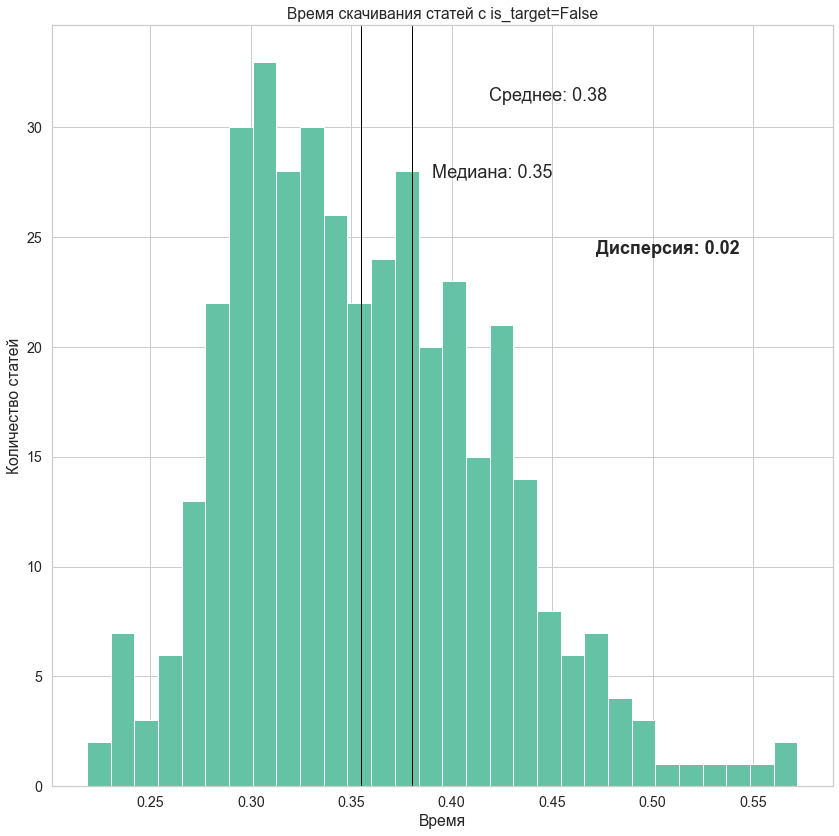

In [67]:
for attr in [True, False]:
    fig, ax = plt.subplots()
    data = work_df[work_df["is_target"] == attr]["time"]
    ax.hist(data[data < 0.6], bins=30)
    ax.set_title(f"Время скачивания статей с is_target={attr}")
    ax.set_xlabel("Время")
    ax.set_ylabel("Количество статей")
    min_ylim, max_ylim = plt.ylim()
    height = 0.9
    for value, text in zip([data.mean(), data.median()],
                           ["Среднее", "Медиана"]):
        plt.axvline(value, color='black', linestyle='solid', linewidth=1)
        plt.text(value*1.1, max_ylim*height,
            text + ': {:.2f}'.format(value), fontdict={'size': 18})
        height -= 0.1
    plt.text(plt.xlim()[1]*0.8, 0.7*max_ylim, 
             'Дисперсия: {:.2f}'.format(data.var()), fontdict={'size': 18, 'weight': 'bold'})

Предположите, каким известным вам стандартным распределением оно может быть приближено? 

Похоже на нормальное, наверное. Попробуем.

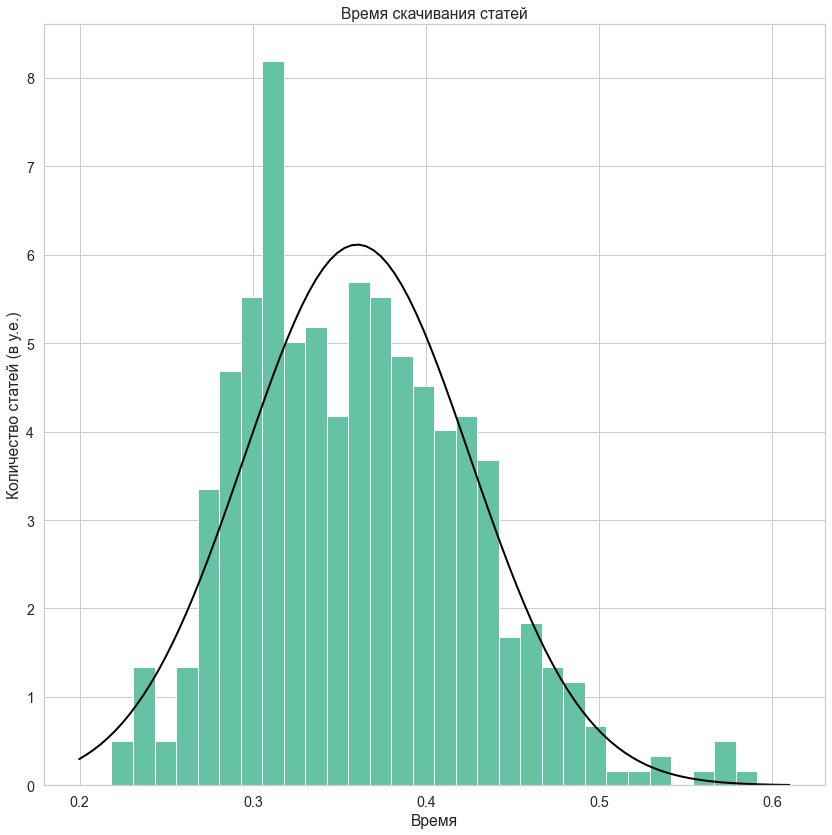

In [69]:
from scipy.stats import norm

fig, ax = plt.subplots()
data = work_df["time"]
data = data[data < 0.6]
ax.hist(data, bins=30, density=True)
ax.set_title("Время скачивания статей")
ax.set_xlabel("Время")
ax.set_ylabel("Количество статей (в у.е.)")

mu, std = norm.fit(data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

**Выводы:**
1. Boxplot анализировать проще, чем несколько гистограм.
2. Существует линейная зависимость между длиной текста и количеством ссылок в нём.
3. В среднем скачивании статьи с вики занимает 0.4 с
4. Распределение этой случайной величины приближается нормальным распределением.